##**Plan Stage**
###**Business Deliverables**
1.   **Problem:** PowerCo has been experiencing significant customer churn, especially in the SME segment.
2. **Goal:** To develop a predictive model that can predict if price sensitiveness is the reason for chustomer churn.
3.**Deliverables:**
A predictive model that can predict which employees are at risk of leaving the company.


**Now importing the all the required packages.**

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# importing the data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import io

Mounted at /content/gdrive


**Importing the given datasets-**

In [3]:
df1 = pd.read_csv('/content/gdrive/MyDrive/BCG_Virtual_experience/client_data.csv')

In [4]:
df2= pd.read_csv("/content/gdrive/MyDrive/BCG_Virtual_experience/price_data.csv")

**Now I try to get the overview of the datasets, check its datatypes and convert them as required. I also look for missing and duplicate values and thus clean the dataset.**

In [5]:
df1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
df2.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


**In the client dataset, we observe that there are date fields which are of datatype object and not datetime.**

In [9]:
df1['date_activ'] = pd.to_datetime(df1['date_activ'])
df1['date_end'] = pd.to_datetime(df1['date_end'])
df1['date_modif_prod'] = pd.to_datetime(df1['date_modif_prod'])
df1['date_renewal'] = pd.to_datetime(df1['date_renewal'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [11]:
df2['price_date']=pd.to_datetime(df2['price_date'])

In [12]:
df2.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [13]:
print(df1.shape)
print(df2.shape)

(14606, 26)
(193002, 8)


In [14]:
df1.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [15]:
df1.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [16]:
print(df2.isna().sum())
df2.duplicated().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


0

In [17]:
df1.duplicated().sum()

0

**Thus we can conclude that there are no null or duplicate values in both the datasets.**

##**Analyze Phase**
**Now we try to perform Exploratory Data Anaysis on the datasets**

In [18]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

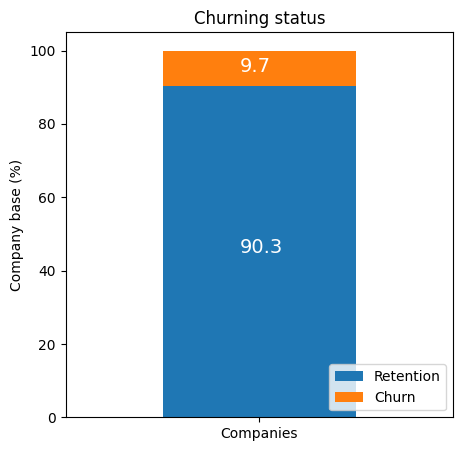

In [19]:
churn = df1[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

We observe that 9.7% of the customers have churned. We clearly notice a class imbalance here. The churned customers are typically a small minority, while the majority of customers are still active. This imbalance can make it difficult to build a machine learning model that can accurately predict churn.

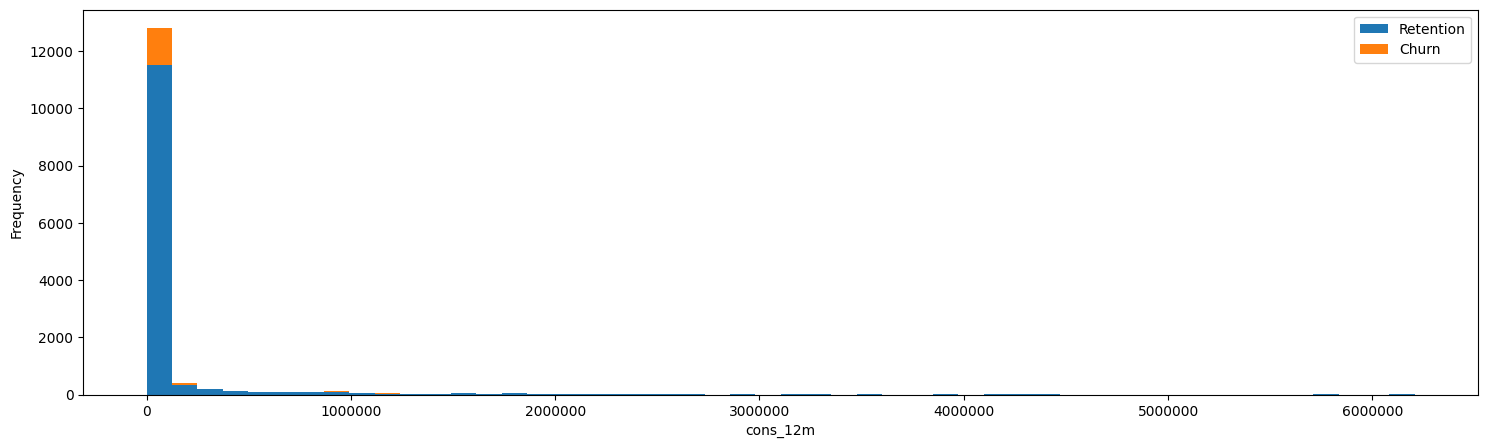

In [20]:
consumption = df1[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [21]:
df1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'foosdfpfkusacimwkcsosbicdxkicaua'),
  Text(1, 0, 'MISSING'),
  Text(2, 0, 'lmkebamcaaclubfxadlmueccxoimlema'),
  Text(3, 0, 'usilxuppasemubllopkaafesmlibmsdf'),
  Text(4, 0, 'ewpakwlliwisiwduibdlfmalxowmwpci'),
  Text(5, 0, 'epumfxlbckeskwekxbiuasklxalciiuu'),
  Text(6, 0, 'sddiedcslfslkckwlfkdpoeeailfpeds'),
  Text(7, 0, 'fixdbufsefwooaasfcxdxadsiekoceaa')])

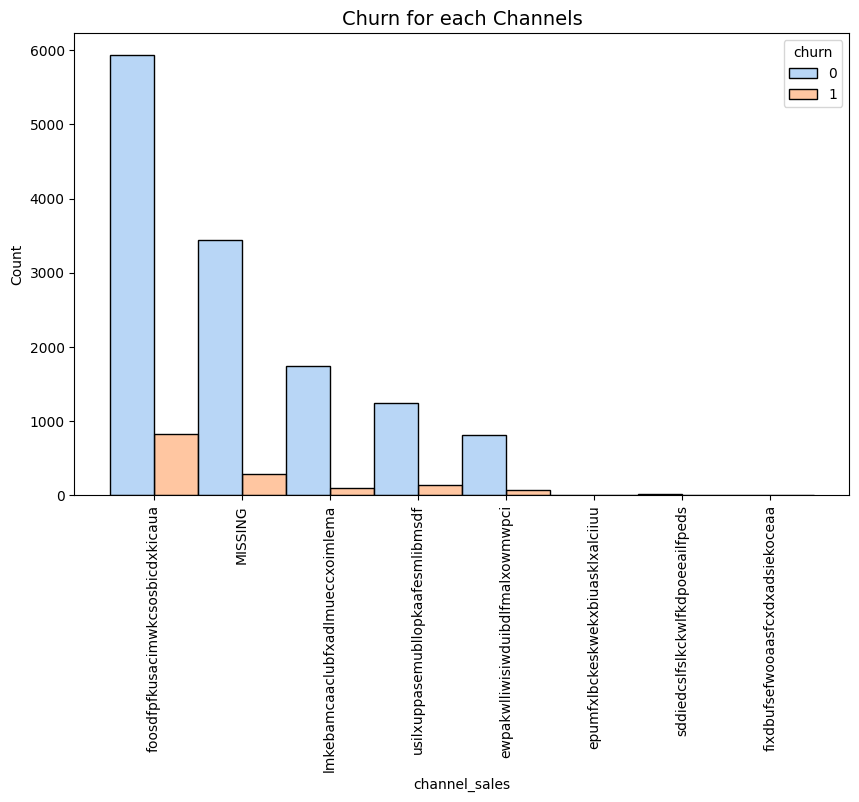

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='channel_sales', hue='churn', multiple='dodge',palette='pastel')
plt.title('Churn for each Channels', fontsize='14')
plt.xticks(rotation='vertical')

**In the above plotted graph we can clearly see which sales channel has the most churned customer ie 'foosdfpfkusacimwkcsosbicdxkicaua'. Thus we should consider this while making the model.**

In [30]:
df1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


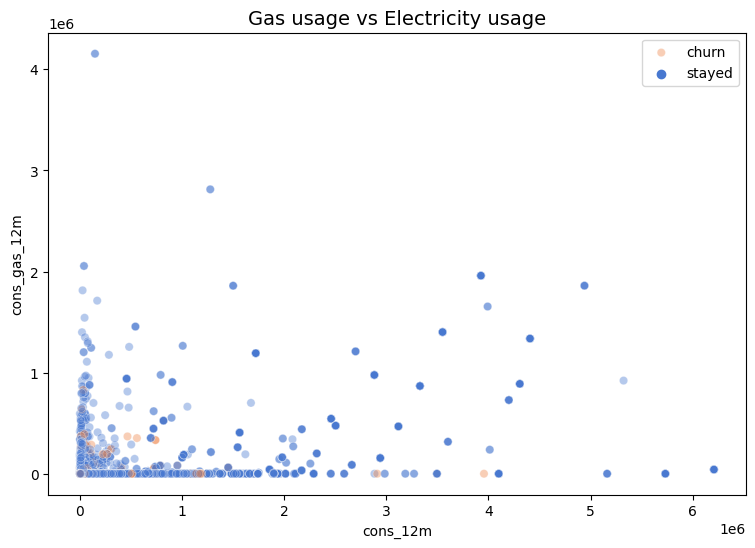

In [32]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=df1['cons_12m'], y=df1['cons_gas_12m'], hue=df1['churn'], alpha=0.4, palette='muted')
plt.legend(labels=[ 'churn', 'stayed'])
plt.title('Gas usage vs Electricity usage', fontsize='14');

The above graph shows a plotted relationship between electricity and gas consumption and the churn rate. We can see that people with less gas and electricity consumption are more likely to be churned.


*   Customers who use less energy are more likely to be price-sensitive. They may be more likely to switch to a competitor if they find a better deal.
*   Another possibility is that customers who use less energy are less satisfied with their service. They may feel that they are not getting enough value for their money.

We will now visualize the consumption of customers during the last month and 12 months against churn using a box plot. A box plot is a great way to visualize the distribution of a numeric variable, such as consumption, and its relationship to a categorical variable, such as churn.

Text(0.5, 1.0, 'Current paid consumption')

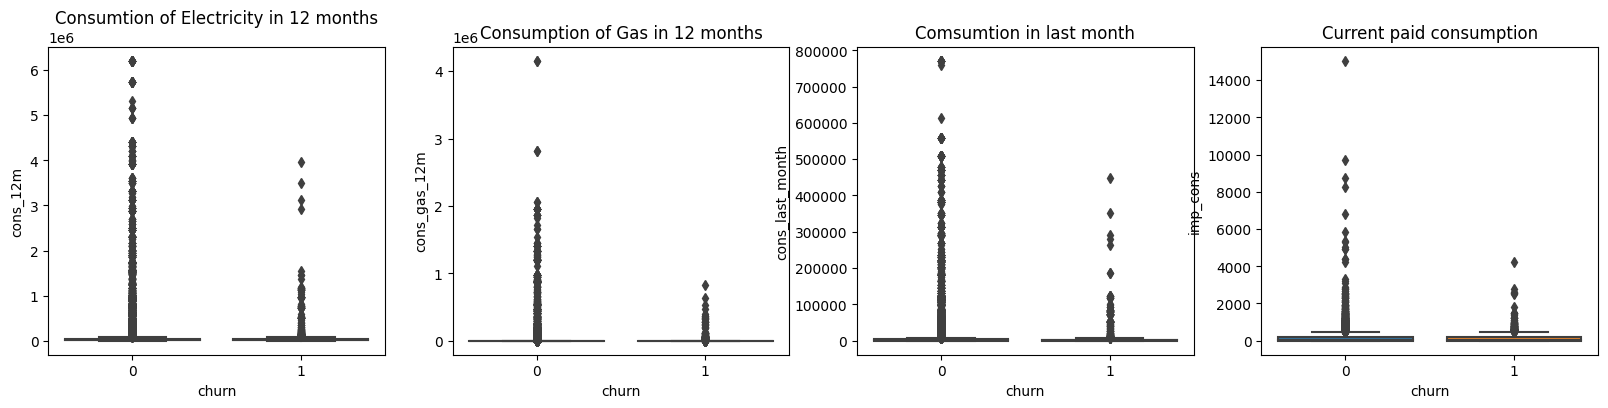

In [39]:
fig, axes = plt.subplots(1,4 ,figsize=(20, 4))
sns.boxplot(y=df1['cons_12m'], x=df1['churn'],ax=axes[0])
sns.boxplot(y=df1['cons_gas_12m'], x=df1['churn'],ax=axes[1])
sns.boxplot(y=df1['cons_last_month'], x=df1['churn'],ax=axes[2])
sns.boxplot(y=df1['imp_cons'], x=df1['churn'],ax=axes[3])
axes[0].set_title('Consumtion of Electricity in 12 months')
axes[1].set_title('Consumption of Gas in 12 months')
axes[2].set_title('Comsumtion in last month')
axes[3].set_title('Current paid consumption')

We observe quite a number of outliers which will be dealt later in feature Engineering.

Text(0.5, 1.0, 'forecasted power price for 1st period (off peak)')

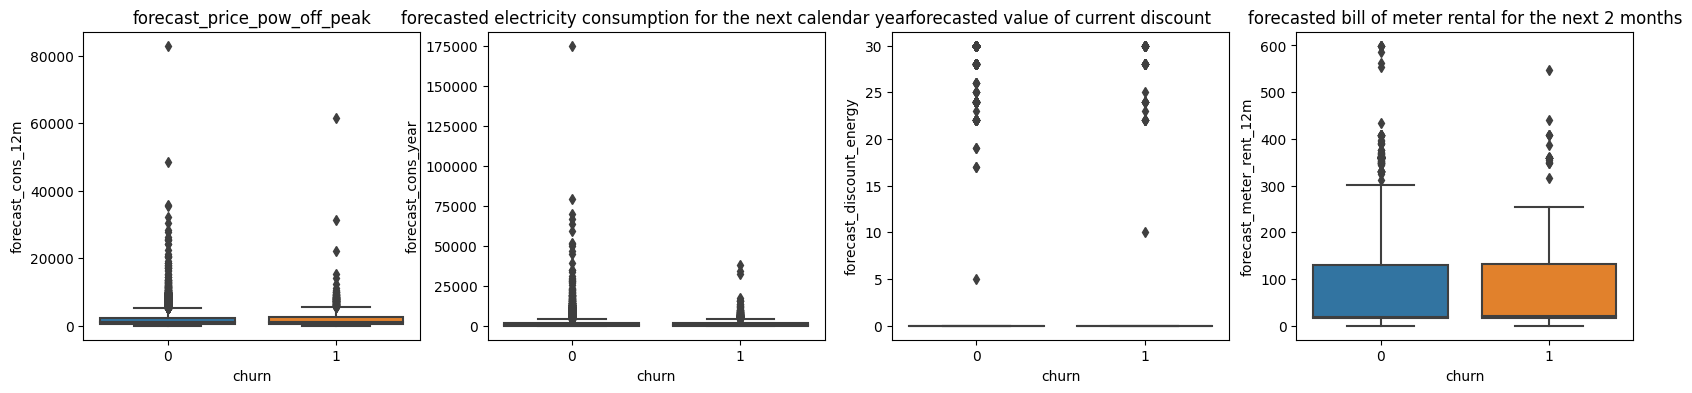

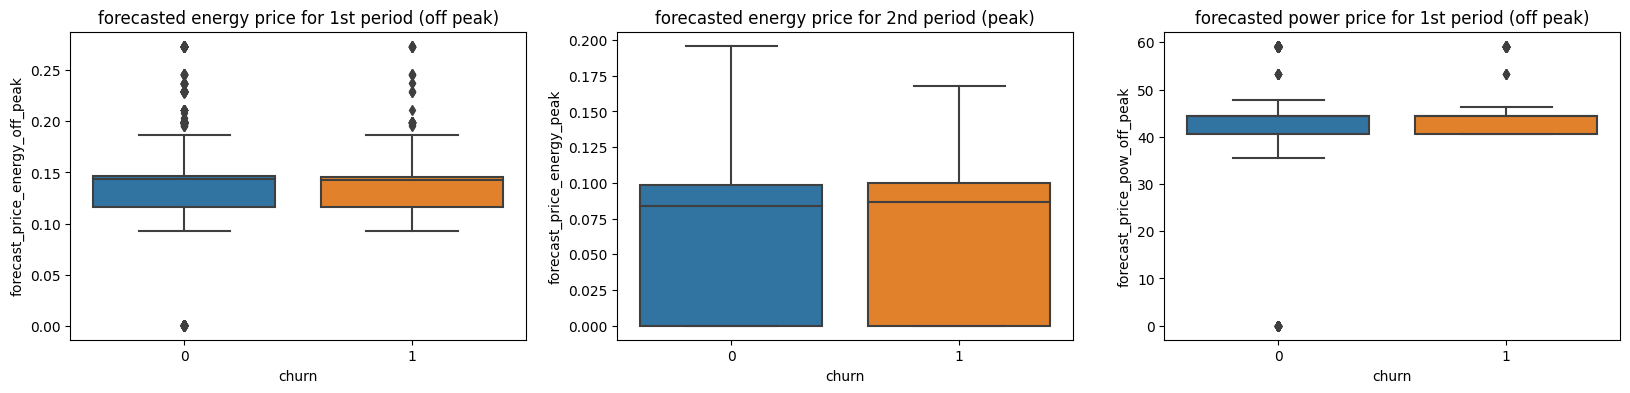

In [41]:
fig, axes = plt.subplots(1,4 ,figsize=(20, 4))
sns.boxplot(y=df1['forecast_cons_12m'], x=df1['churn'],ax=axes[0])
sns.boxplot(y=df1['forecast_cons_year'], x=df1['churn'],ax=axes[1])
sns.boxplot(y=df1['forecast_discount_energy'], x=df1['churn'],ax=axes[2])
sns.boxplot(y=df1['forecast_meter_rent_12m'], x=df1['churn'],ax=axes[3])
axes[0].set_title('forecast_price_pow_off_peak')
axes[1].set_title('forecasted electricity consumption for the next calendar year')
axes[2].set_title('forecasted value of current discount')
axes[3].set_title('forecasted bill of meter rental for the next 2 months')
fig, axes = plt.subplots(1,3 ,figsize=(20, 4))
sns.boxplot(y=df1['forecast_price_energy_off_peak'], x=df1['churn'],ax=axes[0])
sns.boxplot(y=df1['forecast_price_energy_peak'], x=df1['churn'],ax=axes[1])
sns.boxplot(y=df1['forecast_price_pow_off_peak'], x=df1['churn'],ax=axes[2])
axes[0].set_title('forecasted energy price for 1st period (off peak)')
axes[1].set_title('forecasted energy price for 2nd period (peak)')
axes[2].set_title('forecasted power price for 1st period (off peak)')

Similarly here also we observe a lot of outliers.

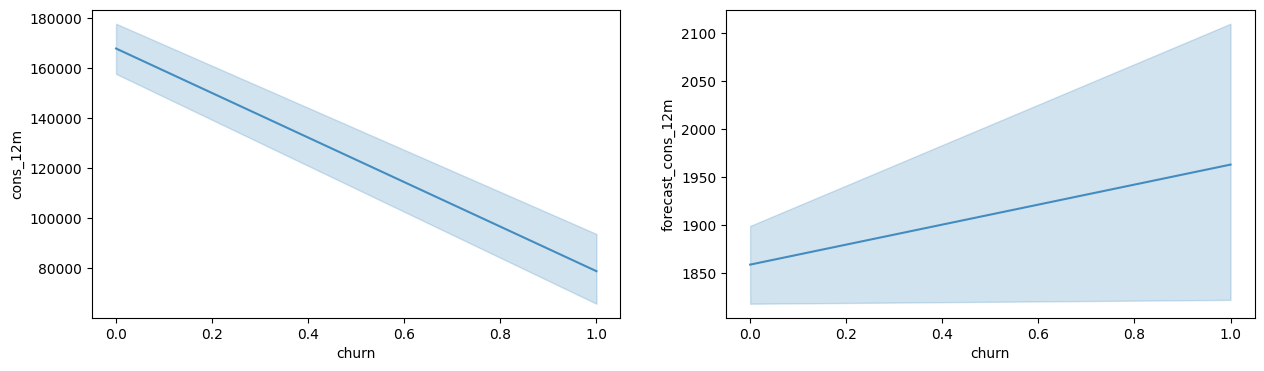

In [73]:
fig, axes = plt.subplots(1,2 ,figsize=(15, 4))
sns.lineplot(y=df1['cons_12m'], x=df1['churn'],alpha=0.8,ax=axes[0])
sns.lineplot(y=df1['forecast_cons_12m'], x=df1['churn'],alpha=0.8,ax=axes[1])
plt.show()

The above plot shows consumption for prev 12 months and churn are inversely related. But we see a different type of graph for the forecasted next 12 months.


*   One possibility is that customers who are planning to churn are already reducing their consumption in anticipation of leaving.
*    Another possibility is that customers who are planning to stay are increasing their consumption in anticipation of staying.



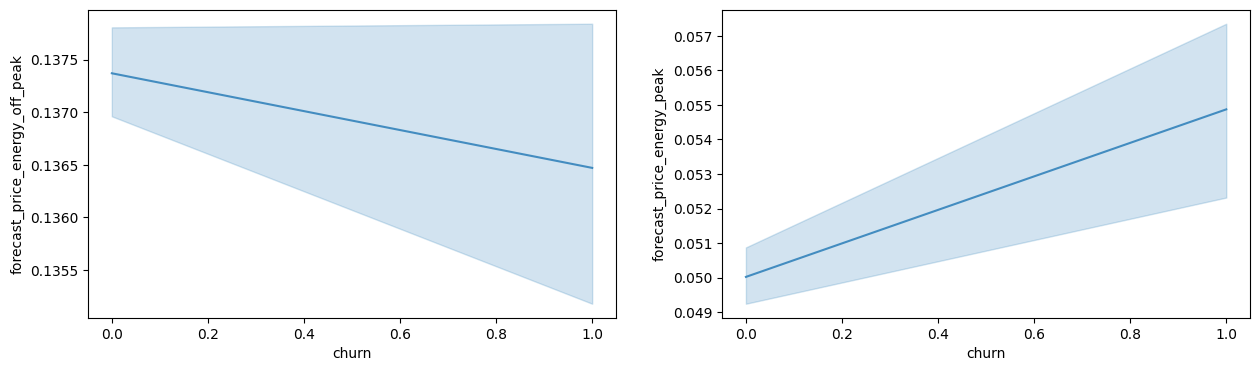

In [74]:
fig, axes = plt.subplots(1,2 ,figsize=(15, 4))
sns.lineplot(y=df1['forecast_price_energy_off_peak'], x=df1['churn'],alpha=0.8,ax=axes[0])
sns.lineplot(y=df1['forecast_price_energy_peak'], x=df1['churn'],alpha=0.8,ax=axes[1])
plt.show()

The above plot shows that forecasted energy prices for 1st period (off-peak) and churn are inversely related. But we see a different type of graph for the forecasted price of energy for forecasted energy price for 2nd period (peak).

*   One possibility is that customers are more sensitive to off-peak prices than peak prices. This could be because off-peak prices are more likely to affect their daily lives, such as when they do laundry or run the dishwasher.


*   Another possibility is that customers have already factored in the cost of peak prices when they are making their decision to churn. This could be because they have a budget for energy costs or because they have a renewable energy plan that protects them from price spikes.



In [75]:
contract_type = df1[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

Text(0.5, 1.0, 'Contract Type')

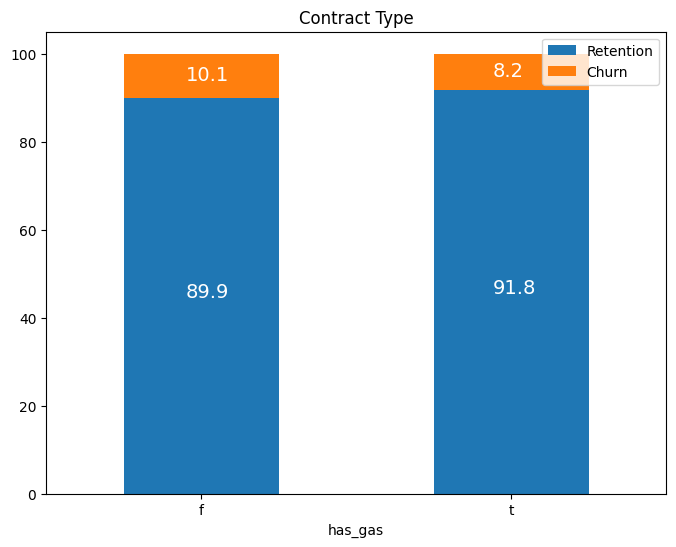

In [76]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc="upper right")
plt.title("Contract Type")

The churn rate for customers without contracts is typically higher than the churn rate for customers with contracts. This is because customers without contracts are more likely to switch providers if they find a better deal. They may also be less satisfied with their service because they do not have the same level of commitment to their provider.

Text(0.5, 1.0, 'total net margin')

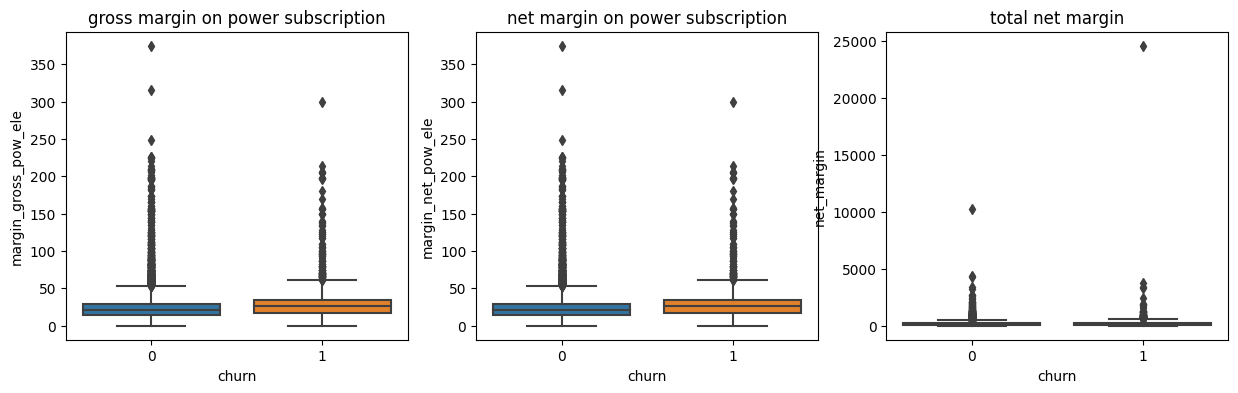

In [105]:
fig, axes = plt.subplots(1,3 ,figsize=(15, 4))
sns.boxplot(y=df1['margin_gross_pow_ele'], x=df1['churn'],ax=axes[0])
sns.boxplot(y=df1['margin_net_pow_ele'], x=df1['churn'],ax=axes[1])
sns.boxplot(y=df1['net_margin'], x=df1['churn'],ax=axes[2])
axes[0].set_title('gross margin on power subscription')
axes[1].set_title('net margin on power subscription')
axes[2].set_title('total net margin')

We also observe outliers here.

In [78]:
df2['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [83]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

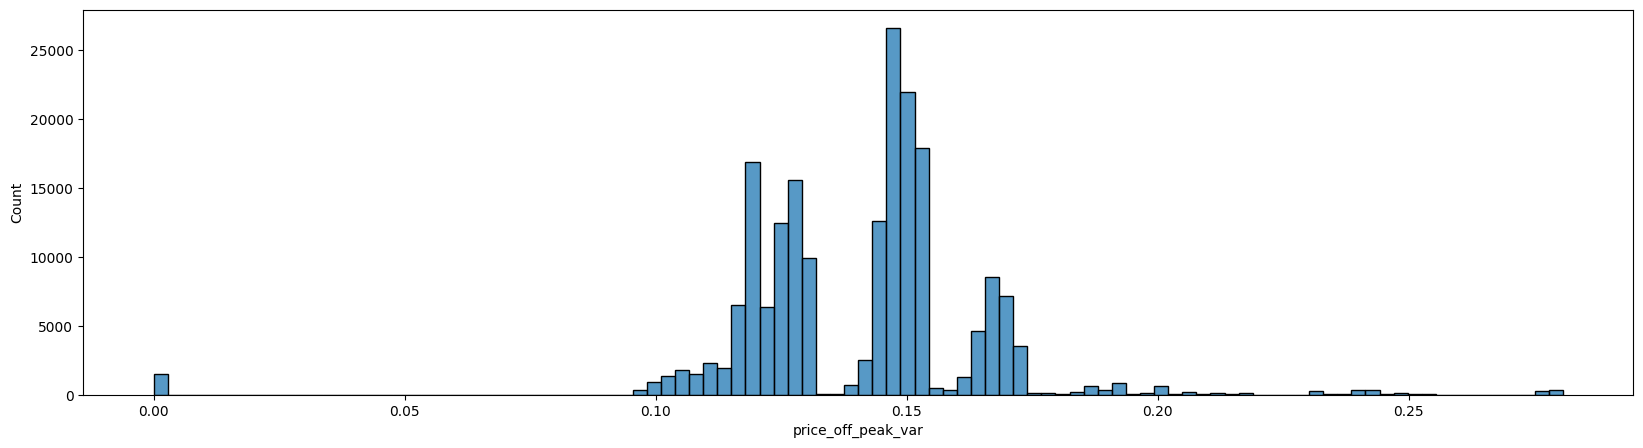

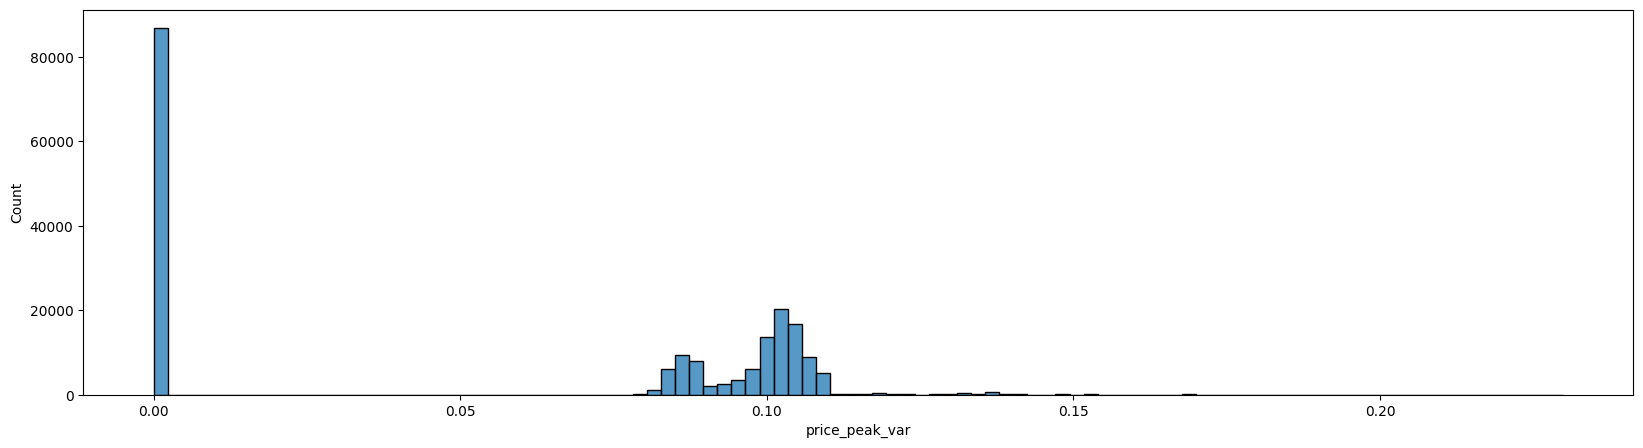

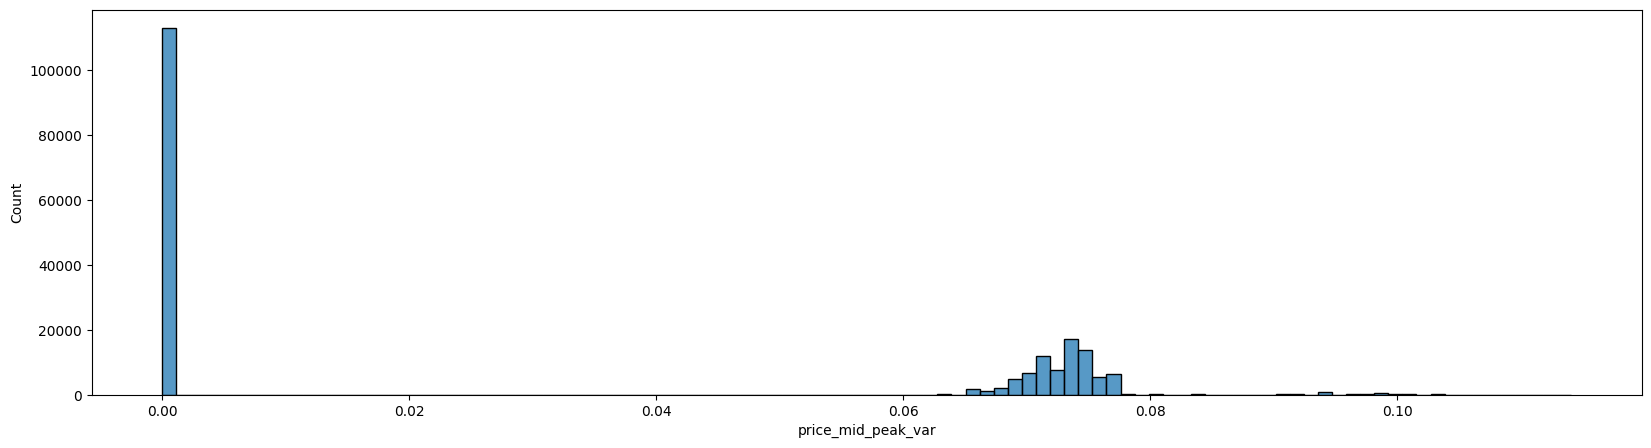

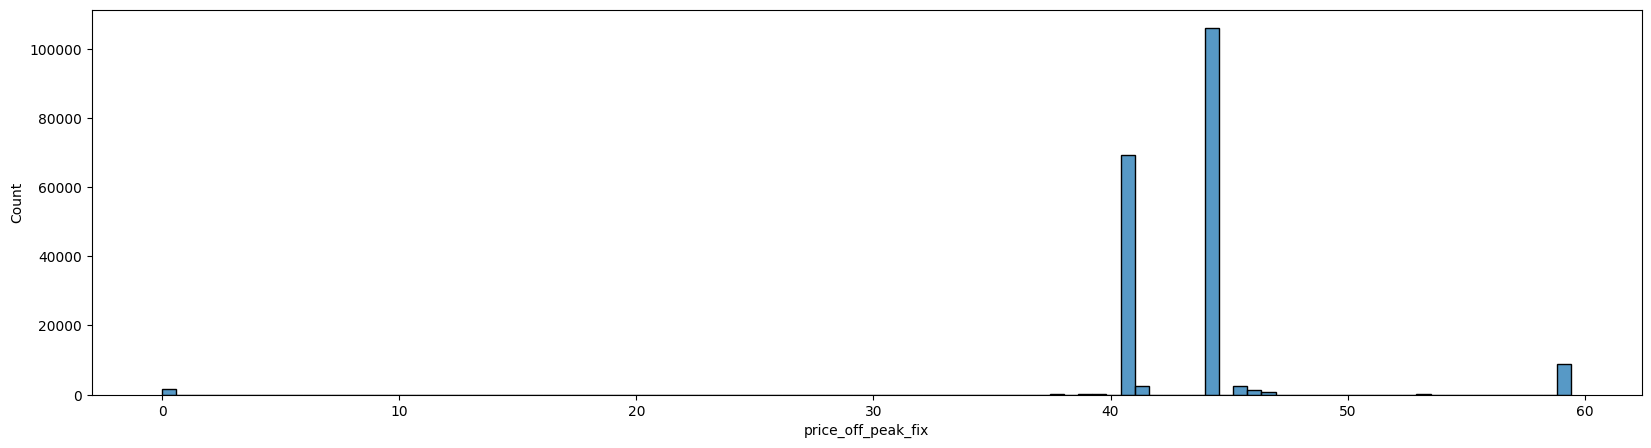

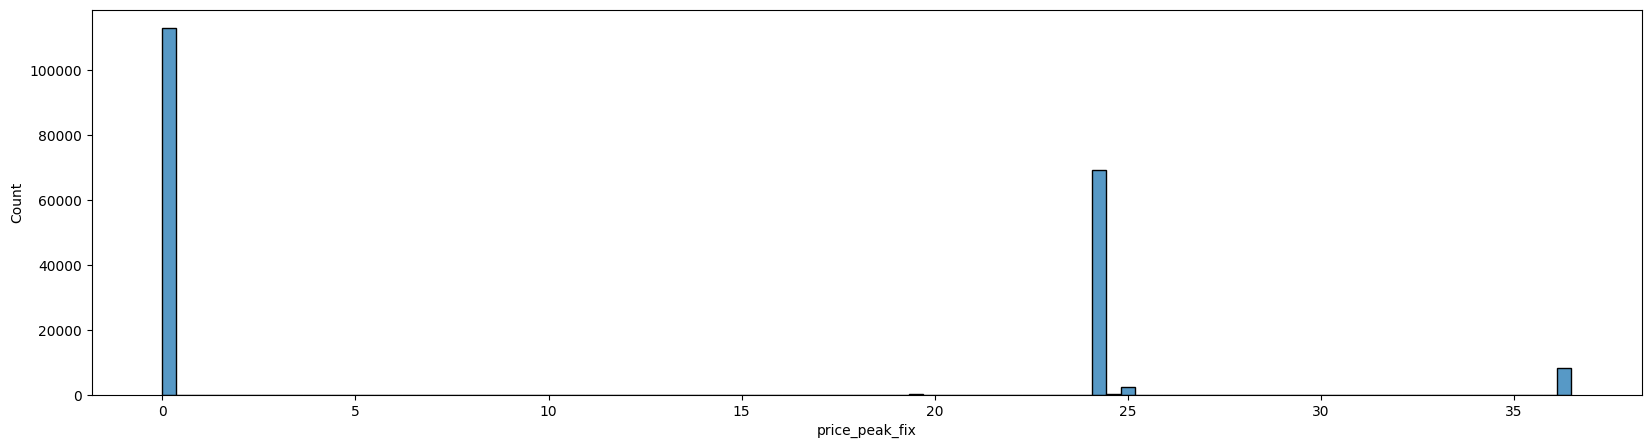

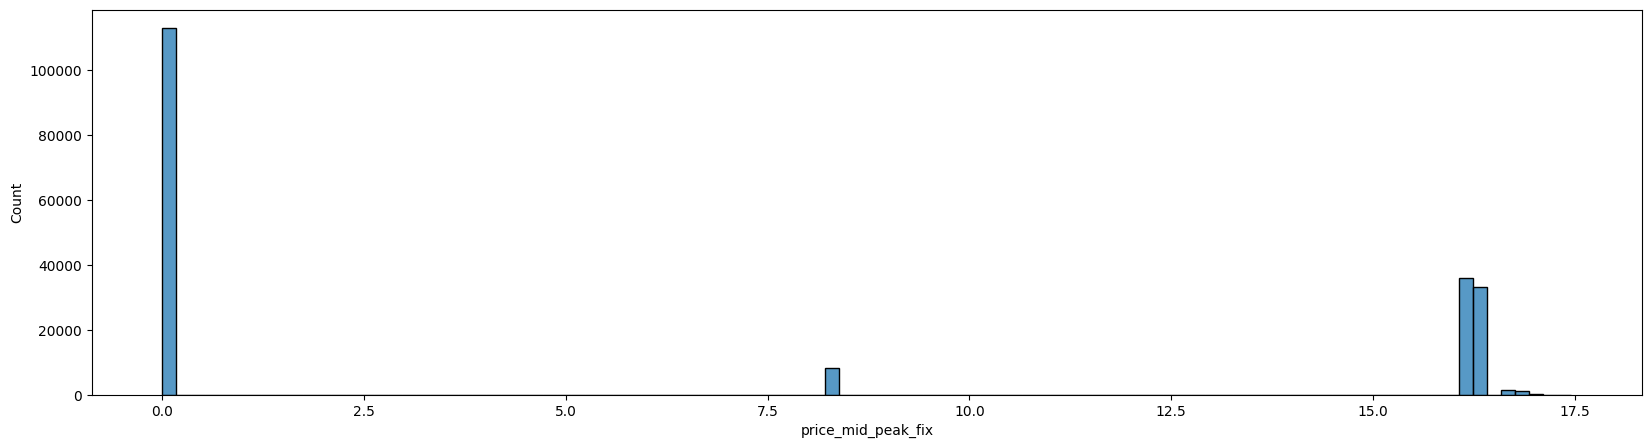

In [86]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=df2, target_variable=attr, if_churn=False)

There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices.
Since there are very few 0 off-peak prices, it would be difficult to get a meaningful measure of price sensitivity based on those prices. However, I can still get a general idea of how price sensitive consumers are to off-peak prices by looking at the range of prices that are offered.

##**Hypothesis Investigation**
Now we will check price sesitivity of the customers.When customers leave after a price increase, it's a good indication that they are price sensitive. This is because they are willing to switch to a competitor or forgo the product or service altogether rather than pay the higher price.

On the other hand, if customers leave even though there is no price increase or even a price decrease, it's harder to say whether they are price sensitive. There could be other reasons for them leaving, such as dissatisfaction with the product or service, or a change in their needs.

For further investigation, we divide the companies of the year 2015 into 4 quarters.

In [87]:
mean_year = df2.groupby(['id']).mean().reset_index()
mean_9m = df2[df2['price_date'] > '2015-09-01'].groupby(['id']).mean().reset_index()
mean_6m = df2[df2['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = df2[df2['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

<ipython-input-87-a46f8bf0b54e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_year = df2.groupby(['id']).mean().reset_index()
<ipython-input-87-a46f8bf0b54e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_9m = df2[df2['price_date'] > '2015-09-01'].groupby(['id']).mean().reset_index()
<ipython-input-87-a46f8bf0b54e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_6m = df2[df2['price_date'] > '2015-

In [90]:
mean_year.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [92]:
mean_year = mean_year.rename(
    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [94]:
mean_9m = mean_9m.rename(
    columns={
        "price_off_peak_var": "mean_9m_price_off_peak_var",
        "price_peak_var": "mean_9m_price_peak_var",
        "price_mid_peak_var": "mean_9m_price_mid_peak_var",
        "price_off_peak_fix": "mean_9m_price_off_peak_fix",
        "price_peak_fix": "mean_9m_price_peak_fix",
        "price_mid_peak_fix": "mean_9m_price_mid_peak_fix"
    }
)

mean_9m["mean_9m_price_off_peak"] = mean_9m["mean_9m_price_off_peak_var"] + mean_9m["mean_9m_price_off_peak_fix"]
mean_9m["mean_9m_price_peak"] = mean_9m["mean_9m_price_peak_var"] + mean_9m["mean_9m_price_peak_fix"]
mean_9m["mean_9m_price_med_peak"] = mean_9m["mean_9m_price_mid_peak_var"] + mean_9m["mean_9m_price_mid_peak_fix"]

In [95]:
mean_6m = mean_6m.rename(
    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [96]:
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_med_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [99]:
price1 = pd.merge(mean_year, mean_9m, on='id')
price2 = pd.merge(price1, mean_6m, on='id')
price3= pd.merge(price2, mean_3m, on='id')
price=pd.merge(price3, df1[['id', 'churn']], on='id')

In [100]:
price.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,mean_9m_price_off_peak_var,mean_9m_price_peak_var,mean_9m_price_mid_peak_var,mean_9m_price_off_peak_fix,mean_9m_price_peak_fix,mean_9m_price_mid_peak_fix,mean_9m_price_off_peak,mean_9m_price_peak,mean_9m_price_med_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


<ipython-input-106-8c99c761698e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price.corr()


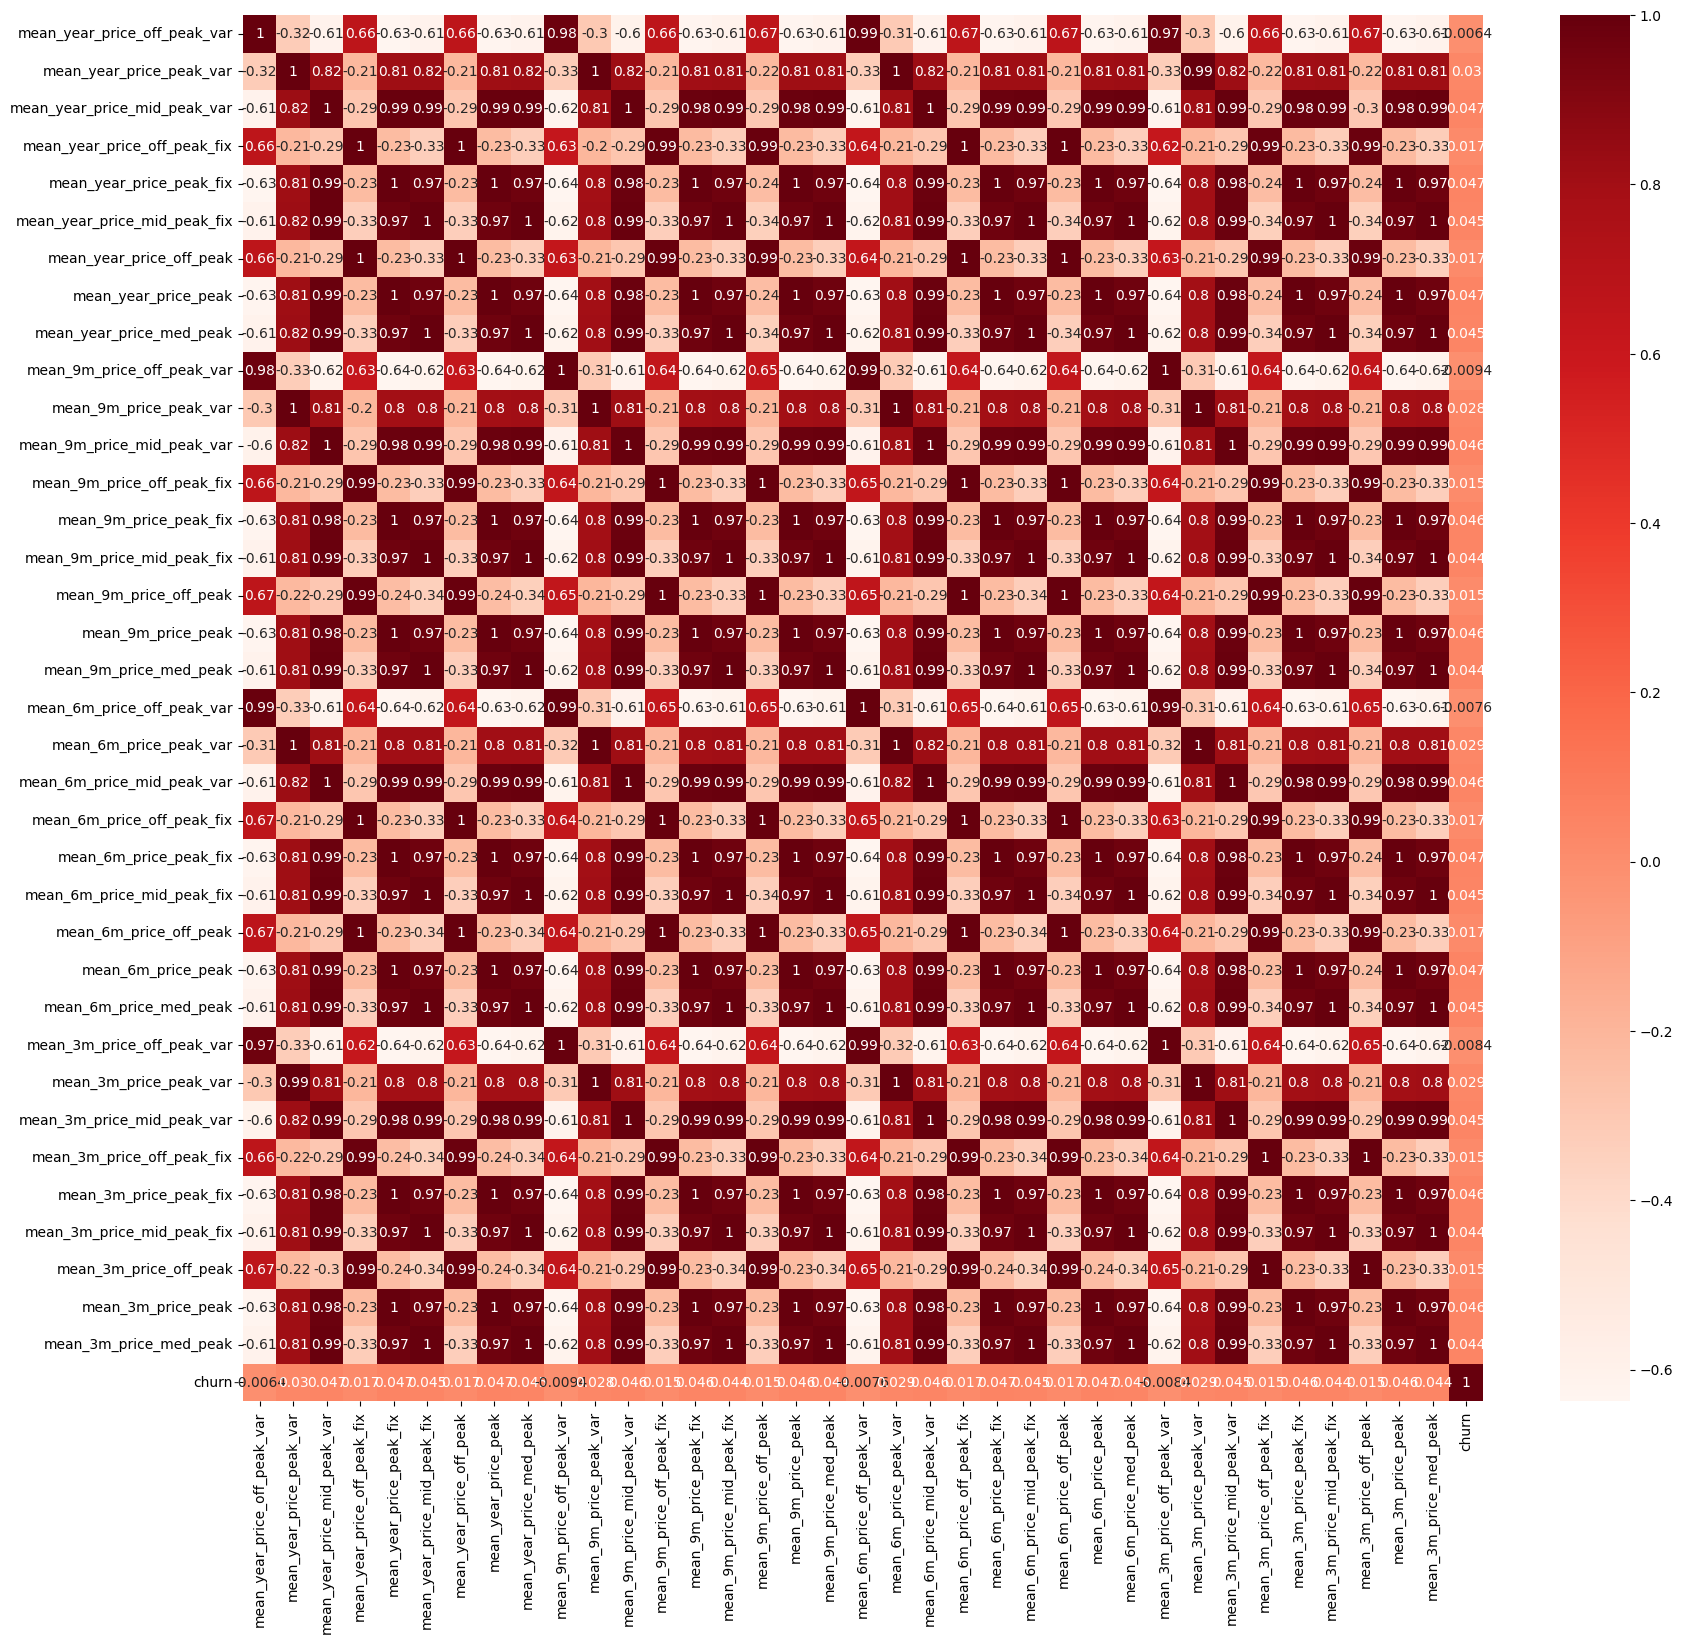

In [106]:
corr = price.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Reds', annot = True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The above plot shows the correlation of prices at different time of year with churn.But, **the correlation between churn and price variables is very low**, which means that there is not a strong relationship between the two variables. In other words, changes in price do not seem to have a significant impact on customer churn.

This could be because other factors are more important to customers than price, such as the quality of the product or service, the level of customer service, or the availability of alternatives. It's also possible that customers are not very price sensitive for this particular product or service.

**Of course, it's important to note that correlation does not equal causation.**
Just because there is no strong correlation between churn and price variables does not mean that price is not a factor. Price may be a factor, but it's just not the most important factor.

The best way to determine whether price is a factor in customer churn is to conduct further analysis.